# Reconocimiento de dígitos con KNN



Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [3]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: build: File exists
-- The C compiler identification is AppleClang 10.0.0.10001044
-- The CXX compiler identification is AppleClang 10.0.0.10001044
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /opt/anaconda3/bin/python (found version "3.7.6") 
-- Found PythonLibs: /opt/anaconda3/lib/libpython3.7m.dylib
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing 

In [12]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/Users/celeste/facultad/metnum-tp2/notebooks
Python 3.7.6


## Explorando los datos

In [13]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np

df_train = pd.read_csv("../data/train.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Es un csv, con columnas por cada pixel

In [14]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [36]:
df_train = df_train[:10000]

En el primer caracter está el dígito a reconocer. Llamamos a esto `y_train`

In [37]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((1000, 784), (1000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

In [38]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")


IndexError: index 1917 is out of bounds for axis 0 with size 1000

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [39]:
df_train["label"].value_counts(normalize=True)

2    0.124
0    0.107
7    0.105
4    0.102
9    0.097
6    0.097
1    0.096
8    0.093
3    0.090
5    0.089
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [40]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")


Ahora tengo 800 instancias de entrenamiento y 200 de validación


In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(5)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)


In [42]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))


Accuracy: 0.79
CPU times: user 163 ms, sys: 4.84 ms, total: 168 ms
Wall time: 181 ms


In [70]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import time
i = 5
ks = np.empty(0, dtype='d')
ac = np.empty(0, dtype='d')
rc = np.empty(0, dtype='d')
tm = np.empty(0, dtype='d')
pc = np.empty(0, dtype='d')
while i <= 200:
  start = time.time()
  clf = metnum.KNNClassifier(i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_val)
  end = time.time()
  ac_score = accuracy_score(y_val, y_pred)
  rc_score = recall_score(y_val, y_pred, labels = [0,1,2,3,4,5,6,7,8,9], average='macro', zero_division = 1)
  prec_score = precision_score(y_val, y_pred, labels = [0,1,2,3,4,5,6,7,8,9], average='macro', zero_division = 1)
  ac = np.append(ac, ac_score)
  rc = np.append(rc, rc_score)
  ks = np.append(ks, i)
  tm = np.append(tm, (end-start)/60)
  i = i + 5

In [71]:
print(tm)
print(ks)
print(ac)
print(rc)

[0.00288665 0.00243936 0.00259844 0.00326145 0.00294907 0.00275427
 0.00353525 0.00487322 0.00295523 0.002984   0.0027146  0.00280224
 0.00289347 0.00292521 0.00281278 0.00247042 0.00254043 0.00268762
 0.00255205 0.0025879  0.00264683 0.00263235 0.00265854 0.0026683
 0.00271465 0.00259123 0.00278128 0.00274932 0.0025842  0.00265382
 0.00260608 0.00267177 0.00263942 0.00264142 0.0026769  0.00251048
 0.00284455 0.00300827 0.00291812 0.0027119 ]
[  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.
  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135. 140.
 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200.]
[0.79  0.785 0.775 0.765 0.755 0.725 0.73  0.725 0.715 0.72  0.715 0.725
 0.705 0.7   0.705 0.68  0.655 0.66  0.65  0.645 0.635 0.63  0.625 0.62
 0.62  0.615 0.61  0.605 0.6   0.595 0.595 0.605 0.59  0.59  0.575 0.56
 0.56  0.55  0.55  0.535]
[0.7808658  0.78274892 0.76987013 0.76175325 0.75103896 0.72290043
 0.72365801 0.71670996 0.70980519 0.716

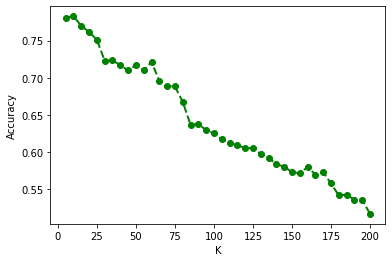

In [72]:
plt.plot(ks, rc, color='green', marker='o', linestyle='dashed',
...      linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.savefig('5000accuracy.png')

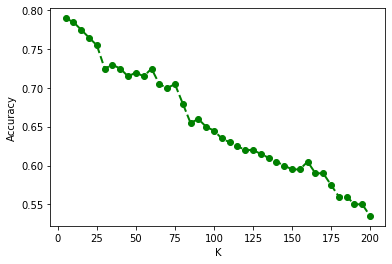

In [50]:
plt.plot(ks, ac, color='green', marker='o', linestyle='dashed',
...      linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.savefig('5000accuracy.png')